# ***Tech Challenge - Fase 2***

## **Grupo 38**


Leadnro Braga Alves

Rodrigo Mitsuo Yoshida

Roberto Yukio Ihara

## O Problema

Imagine que você foi escalado para um time de investimentos e precisará realizar um modelo preditivo com dados da IBOVESPA (Bolsa de valores) para criar uma série temporal e prever diariamente o fechamento da base. Para isso utilize a base de dados contida no site da investing e selecione o período “diário”, com o intervalo de tempo que achar adequado. Você precisará demonstrar para o time de investimentos:
- O modelo com o storytelling, desde a captura do dado até a entrega do modelo;
- Justificar a técnica utilizada;
- Atingir uma acuracidade adequada (acima de 70%).

## Análise Exploratória dos Dados

Bibliotecas

In [428]:
import pandas as pd
import numpy as np 
import warnings
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from dateutil.relativedelta import relativedelta

from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

warnings.filterwarnings("ignore")

Vamos utilizar o yfinance que é uma biblioteca do Python que permite a extração e análise de dados financeiros do Yahoo Finance.

In [429]:
ticker = '^BVSP'
inicio = '2000-01-01'
#pega um mês antes da data passada para preencher o primeiros dias do ano.
inicio_anterior = pd.to_datetime('2023-01-01')
inicio_anterior = inicio_anterior - relativedelta(months=1)
fim = '2024-02-01'

#carrega informacoes do IBovespa
df = yf.download(ticker, start=inicio_anterior, end=fim)

#seleciona somente a coluna de fechamento
df_close = df[['Close']]

df_close.head()

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2022-12-01,110926.0
2022-12-02,111924.0
2022-12-05,109401.0
2022-12-06,109533.0
2022-12-07,109361.0


Como o Ibovespa possui somente cotação dos dias úteis vamos preencher os dias faltantes com a última cotação conhecida.

In [430]:
#Criar datas faltantes repetindo o valor ultima data conhecida
df_close_resample = df_close
df_close_resample = df_close_resample.resample('D').ffill()
df_close_resample = df_close_resample[df_close_resample.index >= inicio]

df_close_resample['id'] = range(1, len(df_close_resample) + 1)
df_close_resample.reset_index(inplace=True)
df_close_resample = df_close_resample.set_index('id')

df_close_resample['Date'] = pd.to_datetime(df_close_resample['Date'], format='%Y-%m-%d')

#renomear colunas do dataframe
df_close_resample.columns = ['ds', 'y']
df_close_resample['unique_id'] = 'IBOV'


df_close_resample.head(20)

,ds,y,unique_id
id,,,
1,2022-12-01,110926.0,IBOV
2,2022-12-02,111924.0,IBOV
3,2022-12-03,111924.0,IBOV
4,2022-12-04,111924.0,IBOV
5,2022-12-05,109401.0,IBOV
6,2022-12-06,109533.0,IBOV
7,2022-12-07,109361.0,IBOV
8,2022-12-08,107245.0,IBOV
9,2022-12-09,107689.0,IBOV


## Decomposição

## Estacionária ou Não Estacionária

## Transformar em Estacionária

## Mais Estacionária

## Modelos

Vamos utilizar a métrica wMAPE (Weighted Mean Absolute Percentage Error ou Erro Absoluto Percentual Médio Ponderado) para avaliar os modelos.

In [431]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

## Modelo Utilizado

## Conclusão

In [432]:
#Separar dados de treino e validação resample
train_resample = df_close_resample[df_close_resample['ds'] < '2024-01-01']
test_resample = df_close_resample[df_close_resample['ds'] >= '2024-01-01']
h_resample = len(test_resample)


In [433]:
#Usar modelo naive sem decomposição - resample
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(train_resample)

forecast_df = model.predict(h=h_resample, level=[90])
forecast_df = forecast_df.reset_index().merge(test_resample, on=['ds','unique_id'], how='left')
    
wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f"WMAPE: {wmape1:.2%}")


WMAPE: 3.31%


In [434]:
forecast_df.tail(20)

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,y
11,IBOV,2024-01-12,134185.0,128385.906250,139984.093750,130988.0
12,IBOV,2024-01-13,134185.0,128149.117188,140220.890625,130988.0
13,IBOV,2024-01-14,134185.0,127921.265625,140448.734375,130988.0
14,IBOV,2024-01-15,134185.0,127701.421875,140668.578125,131521.0
15,IBOV,2024-01-16,134185.0,127488.789062,140881.218750,129294.0
16,IBOV,2024-01-17,134185.0,127282.703125,141087.296875,128524.0
17,IBOV,2024-01-18,134185.0,127082.593750,141287.406250,127316.0
18,IBOV,2024-01-19,134185.0,126887.968750,141482.031250,127636.0
19,IBOV,2024-01-20,134185.0,126698.406250,141671.593750,127636.0
20,IBOV,2024-01-21,134185.0,126513.523438,141856.468750,127636.0


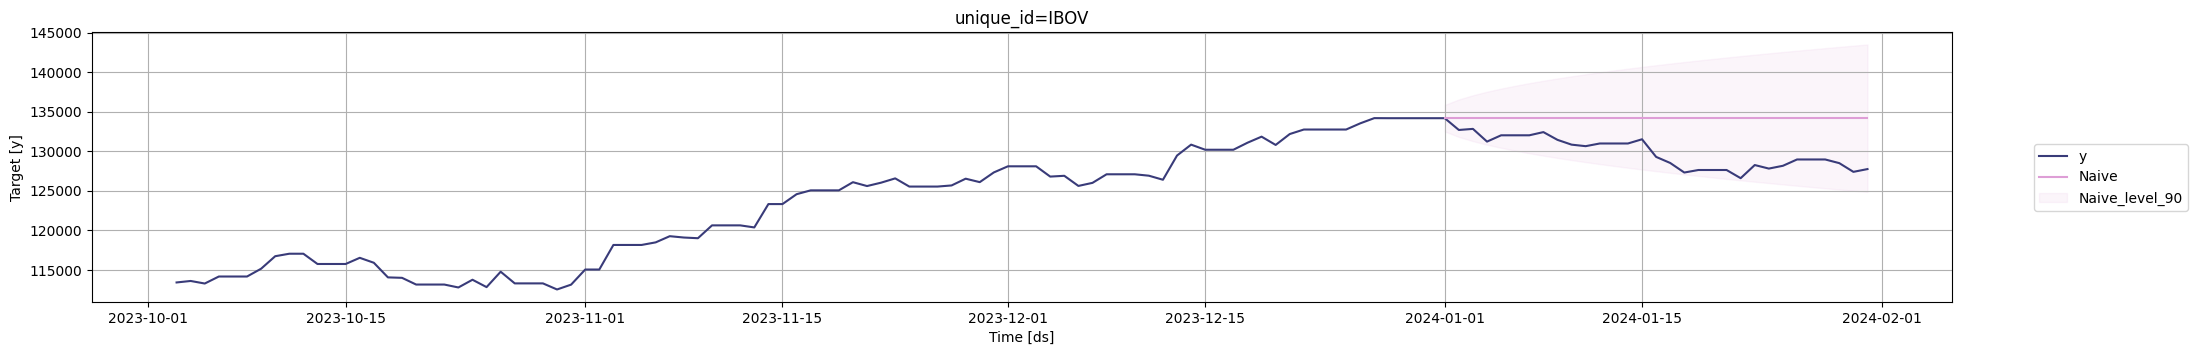

In [435]:
model.plot(train_resample, forecast_df, level=[90], unique_ids=['IBOV'],engine ='matplotlib', max_insample_length=90)

WMAPE: 3.13%


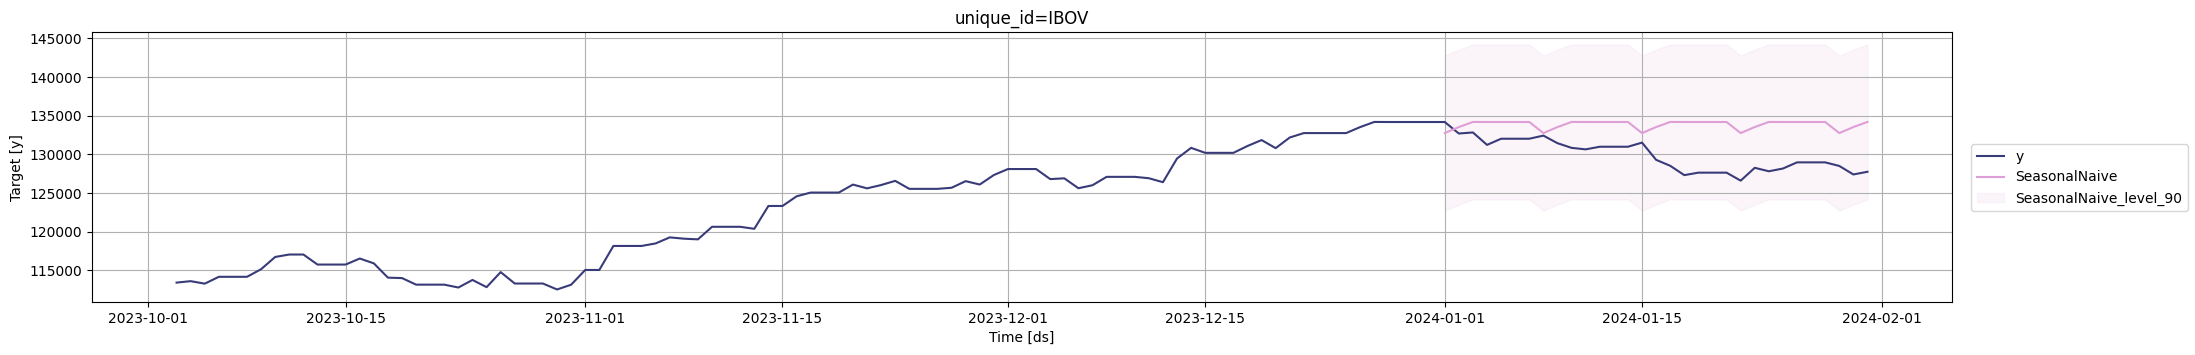

In [436]:
#Usar modelo SeasonalNaive sem decomposição - resample
model = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model.fit(train_resample)

forecast_df2 = model.predict(h=h_resample, level=[90])
forecast_df2 = forecast_df2.reset_index().merge(test_resample, on=['ds','unique_id'], how='left')
    
wmape2 = wmape(forecast_df2['y'].values, forecast_df2['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model.plot(train_resample, forecast_df2, level=[90], unique_ids=['IBOV'], engine='matplotlib', max_insample_length=90)

In [437]:
#Usar modelo SeasonalWindowAverage sem decomposição - resample
model = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=2)], freq='D', n_jobs=-1)
model.fit(train_resample)

forecast_df3 = model.predict(h=h_resample, level=[90])
forecast_df3 = forecast_df3.reset_index().merge(test_resample, on=['ds','unique_id'], how='left')
    
wmape3 = wmape(forecast_df3['y'].values, forecast_df3['SeasWA'].values)
print(f"WMAPE: {wmape3:.2%}")

model.plot(train_resample, forecast_df3, level=[90], unique_ids=['IBOV'], engine='matplotlib', max_insample_length=90)

Exception: You must pass `prediction_intervals` to compute them.

WMAPE: 3.34%


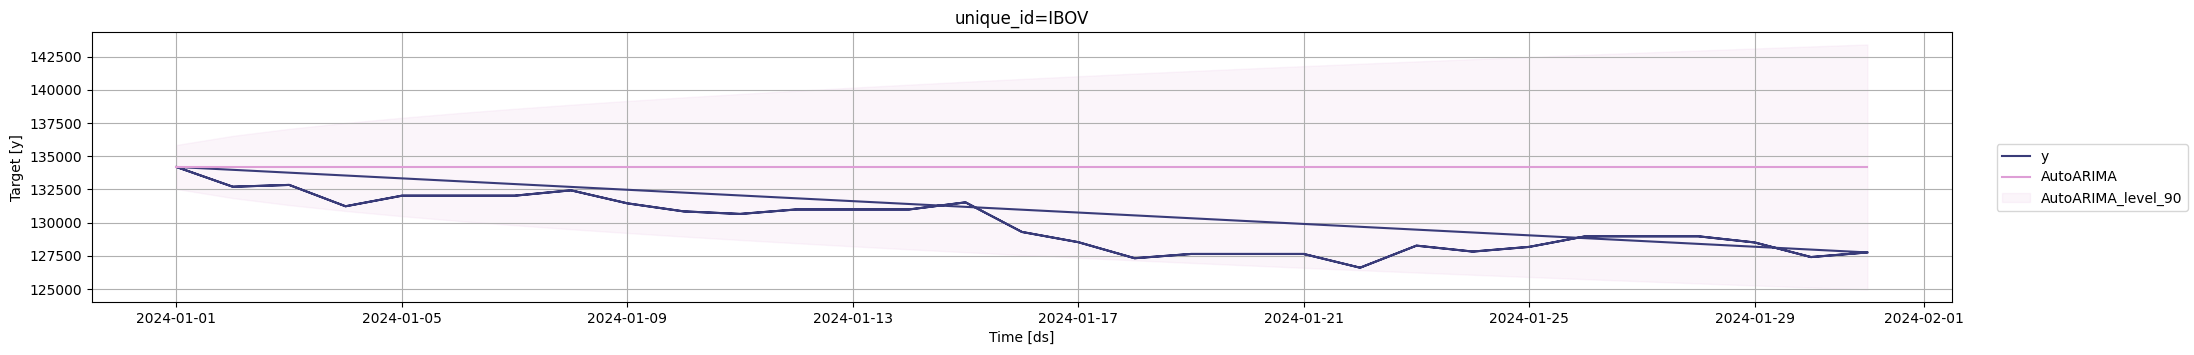

In [ ]:
#ARIMA - AR: olha para as vendas do passado e acha uma correlação futura
# I - quantidade que a série foi diferenciada/ MA: Média Móvel
model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(train_resample)

forecast_dfa = model_a.predict(h=h_resample, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(test_resample, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(test_resample, forecast_dfa, level=[90], unique_ids=['IBOV'],engine ='matplotlib', max_insample_length=90)

In [ ]:
# INTERPOLATE

In [ ]:
#Separar dados de treino e validação interpolados 
train_interpolate = df_close_interpolate[df_close_interpolate['ds'] < '2024-01-01']
test_interpolate = df_close_interpolate[df_close_interpolate['ds'] >= '2024-01-01']
h_interpolate = len(test_interpolate)

In [ ]:
#Usar modelo naive sem decomposição - interpolate
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(train_interpolate)

forecast_df = model.predict(h=h_interpolate, level=[90])
forecast_df = forecast_df.reset_index().merge(test_interpolate, on=['ds','unique_id'], how='left')
    
wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f"WMAPE: {wmape1:.2%}")

WMAPE: 2.67%


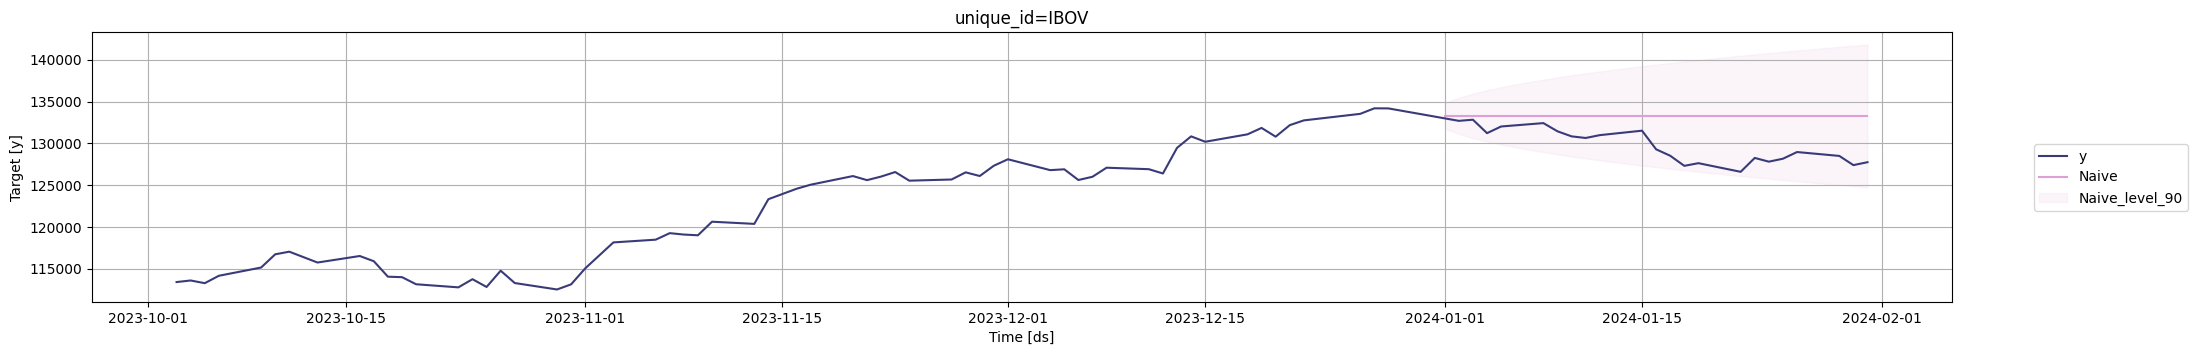

In [ ]:
model.plot(train_interpolate, forecast_df, level=[90], unique_ids=['IBOV'],engine ='matplotlib', max_insample_length=90)

In [ ]:
# DECOMPOSE

In [ ]:
df_decompose = seasonal_decompose(df_close, period=30)


<Axes: xlabel='Date'>

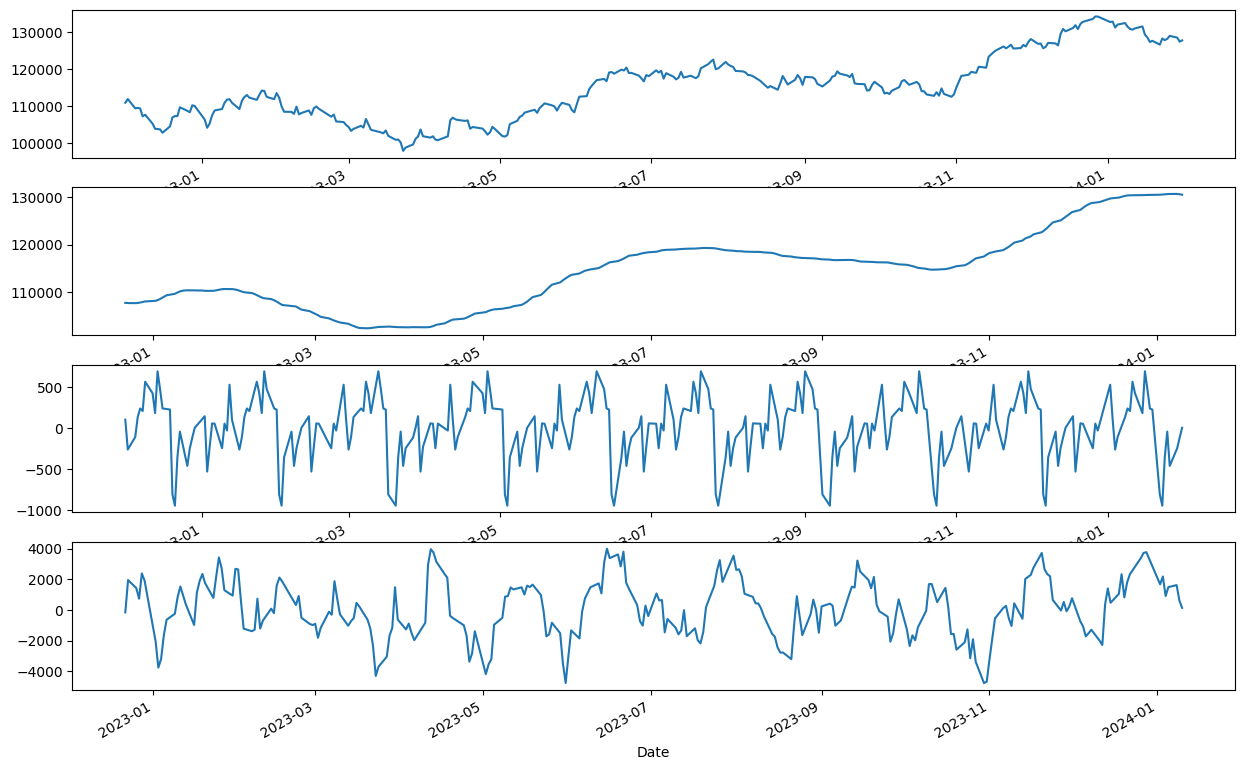

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

df_decompose.observed.plot(ax=ax1)
df_decompose.trend.plot(ax=ax2)
df_decompose.seasonal.plot(ax=ax3)
df_decompose.resid.plot(ax=ax4)